In [ ]:
#Use Python Version 3.11.0


# Imports and Retrieving Data

In [38]:
import pandas as pd

In [39]:
train_df_path =  r"Dataset/train.csv"
train_df = pd.read_csv(train_df_path)

In [40]:
test_df_path = r"Dataset/test.csv"
test_df = pd.read_csv(test_df_path)

# Understanding The Code

In [4]:
train_df.shape

(593994, 13)

In [3]:
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
train_df.dtypes

id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade           object
loan_paid_back          float64
dtype: object

In [24]:
train_df.isnull().sum()

id                          0
annual_income               0
debt_to_income_ratio        0
credit_score                0
loan_amount                 0
interest_rate               0
gender                      0
marital_status              0
education_level             0
employment_status           0
loan_purpose                0
grade_subgrade          27301
loan_paid_back              0
dtype: int64

# Checking Each Column Individually


In [9]:
print("The Min Value Is" ,train_df['annual_income'].min())
print("The Max Value Is", train_df['annual_income'].max())

The Min Value Is 6002.43
The Max Value Is 393381.74


In [10]:
train_df['gender'].value_counts()

gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

In [12]:
train_df['education_level'].value_counts()

education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

In [13]:
train_df['employment_status'].value_counts()

employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

In [14]:
train_df['loan_purpose'].value_counts()

loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64

In [15]:
train_df['grade_subgrade'].value_counts()

grade_subgrade
C3    58695
C4    55957
C2    54443
C1    53363
C5    53317
D1    37029
D3    36694
D4    35097
D2    34432
D5    32101
B2    15167
B1    14344
B5    13937
B3    13926
B4    13877
E4     8036
E3     7075
E1     6891
E2     6372
E5     6084
F5     5947
F4     5535
F1     5534
F2     5203
F3     5082
A5     2471
A3     2066
A2     2018
A4     1701
A1     1600
Name: count, dtype: int64

In [41]:
# Example numeric columns from your dataset
num_cols = [
    'annual_income',
    'debt_to_income_ratio',
    'credit_score',
    'loan_amount',
    'interest_rate'
]

# Compute IQR, skewness, min, max, and range for each numeric column
summary_stats = pd.DataFrame({
    'IQR': [train_df[col].quantile(0.75) - train_df[col].quantile(0.25) for col in num_cols],
    'Skewness': [train_df[col].skew() for col in num_cols],
    'Min': [train_df[col].min() for col in num_cols],
    'Max': [train_df[col].max() for col in num_cols],
    'Range': [train_df[col].max() - train_df[col].min() for col in num_cols]
}, index=num_cols)

print(summary_stats)

                            IQR  Skewness       Min         Max       Range
annual_income         33046.920  1.719509  6002.430  393381.740  387379.310
debt_to_income_ratio      0.084  1.406680     0.011       0.627       0.616
credit_score             73.000 -0.166993   395.000     849.000     454.000
loan_amount            8578.960  0.207360   500.090   48959.950   48459.860
interest_rate             2.690  0.049945     3.200      20.990      17.790


In [30]:
test_df.isnull().sum()

id                          0
annual_income               0
debt_to_income_ratio        0
credit_score                0
loan_amount                 0
interest_rate               0
gender                      0
marital_status              0
education_level             0
employment_status           0
loan_purpose                0
grade_subgrade          11751
dtype: int64

# Logistic Regression Training


In [42]:
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# Normalising
# Option A: map to 1–5 categories
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5
}

# Extract the letter (grade) and map it
train_df['grade_subgrade'] = train_df['grade_subgrade'].str[0].map(grade_mapping)



# Group numeric features by distribution type
robust_features = ['annual_income', 'debt_to_income_ratio', 'loan_amount']
standard_features = ['credit_score', 'interest_rate']

categorical_features = [
    'gender', 'marital_status', 'education_level',
    'employment_status', 'loan_purpose'
]

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), robust_features),
        ('standard', StandardScaler(), standard_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Combine with logistic regression model
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])


In [43]:
# split X and y into training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = train_df.drop(['loan_paid_back','id'], axis=1)
y = train_df['loan_paid_back']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16, stratify=y)

In [44]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve
)

# Predict labels and probabilities
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]   # Probability of class 1 (loan default = 1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


Model Evaluation Metrics:
Accuracy:  0.8998
Precision: 0.9077
Recall:    0.9735
F1 Score:  0.9395
ROC AUC:   0.9103


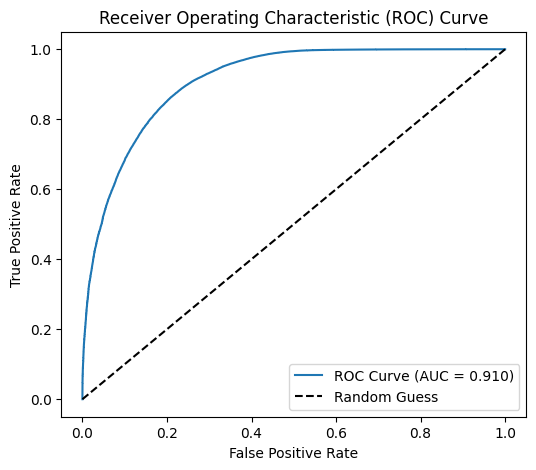

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

loan_paid_back
1.0    0.798819
0.0    0.201181
Name: proportion, dtype: float64


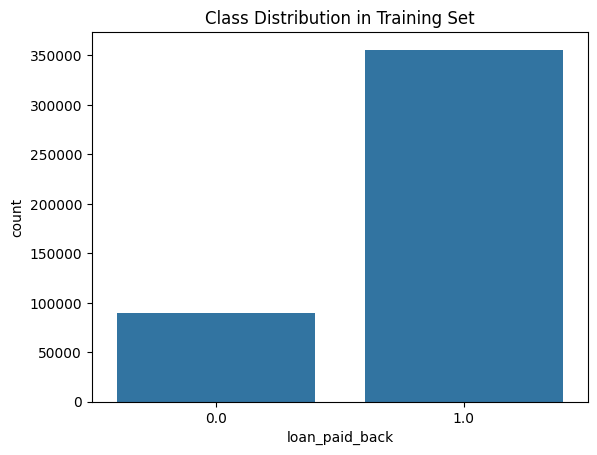

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(y_train.value_counts(normalize=True))

# Optional visual check
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.show()


# Logistic Regression Testing

In [37]:
test_df.dtypes

id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade          float64
dtype: object

In [50]:
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# Normalising
# Option A: map to 1–5 categories
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5
}

# Extract the letter (grade) and map it
test_df['grade_subgrade'] = test_df['grade_subgrade'].str[0].map(grade_mapping)



# Group numeric features by distribution type
robust_features = ['annual_income', 'debt_to_income_ratio', 'loan_amount']
standard_features = ['credit_score', 'interest_rate']

categorical_features = [
    'gender', 'marital_status', 'education_level',
    'employment_status', 'loan_purpose'
]

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), robust_features),
        ('standard', StandardScaler(), standard_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Combine with logistic regression model
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])


In [52]:
# Prepare test features (drop id)
X_test_new = test_df.drop(columns=['id'])

# Build and fit pipeline (if not already fitted)
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit model on training data
model.fit(X_train, y_train)

# Predict class (0 = default, 1 = paid back)
# Since you trained on 'loan_default' (0=paid, 1=default),
# invert predictions to get loan_paid_back labels
y_pred_default = model.predict(X_test_new)          # Predict default class (0 or 1)
y_pred_paidback = 1 - y_pred_default                # Convert to paid_back (1=paid, 0=default)

# Build submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],
    'loan_paid_back': y_pred_paidback
})

# Save to CSV
submission.to_csv('Logistic_Regression_Predicted_Labels_V1.csv', index=False)

# Decision Tree

# K-Nearest Neighbour


# Random Forest

# Support Vector Machine

# Neural Network